In [21]:
import pandas as pd
import pyodbc

import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Database connection
connection = pyodbc.connect(
     "Driver={ODBC Driver 17 for SQL Server};"
     "Server=NIK-S_PREDATOR;"
     "Database=ecommerce_sales;"
     "Trusted_Connection=yes;"
)

# Load tables into Pandas DataFrames
sales = pd.read_sql("SELECT * FROM SalesFact", connection)
customers = pd.read_sql("SELECT * FROM Customers", connection)
products = pd.read_sql("SELECT * FROM Products", connection)
dates = pd.read_sql("SELECT * FROM Dates", connection)

connection.close()

print("Data loaded successfully!")

Data loaded successfully!


In [23]:
sales.to_csv('sales.csv', index=False)
customers.to_csv('customers.csv', index=False)
products.to_csv('products.csv', index=False)
dates.to_csv('dates.csv', index=False)

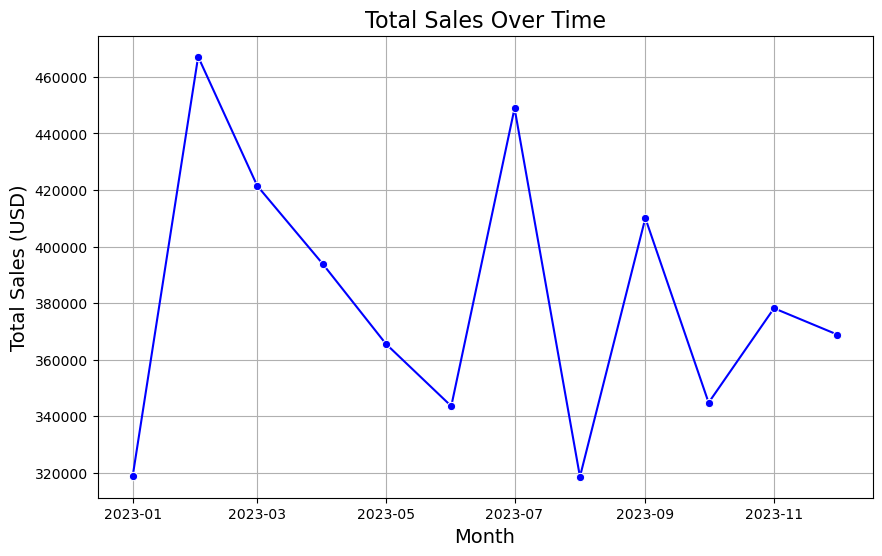

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge Sales with Dates
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
sales_by_month = sales.groupby(sales['OrderDate'].dt.to_period('M')).sum(numeric_only=True).reset_index()
sales_by_month['OrderDate'] = sales_by_month['OrderDate'].dt.to_timestamp()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_month, x='OrderDate', y='TotalPrice', marker='o', color='blue')
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (USD)', fontsize=14)
plt.grid(True)
plt.show()

C:\Users\garbh\AppData\Local\Temp\ipykernel_51168\2820953371.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, y='Name', x='TotalPrice', palette='viridis')


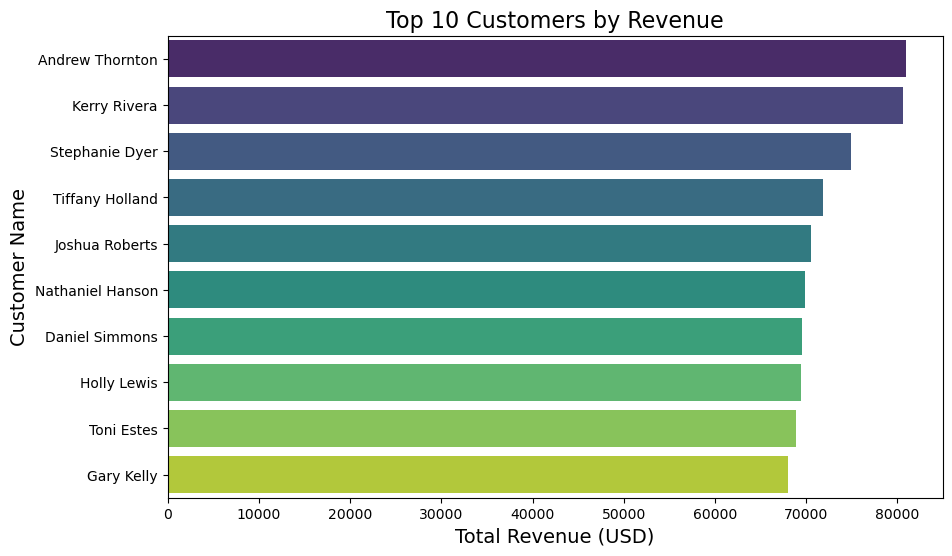

In [7]:
# Merge Sales with Customers
sales_customers = pd.merge(sales, customers, on='CustomerID')
top_customers = sales_customers.groupby('Name')['TotalPrice'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, y='Name', x='TotalPrice', palette='viridis')
plt.title('Top 10 Customers by Revenue', fontsize=16)
plt.xlabel('Total Revenue (USD)', fontsize=14)
plt.ylabel('Customer Name', fontsize=14)
plt.show()

C:\Users\garbh\AppData\Local\Temp\ipykernel_51168\2722082423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stock_by_category, x='Category', y='Stock', palette='mako')


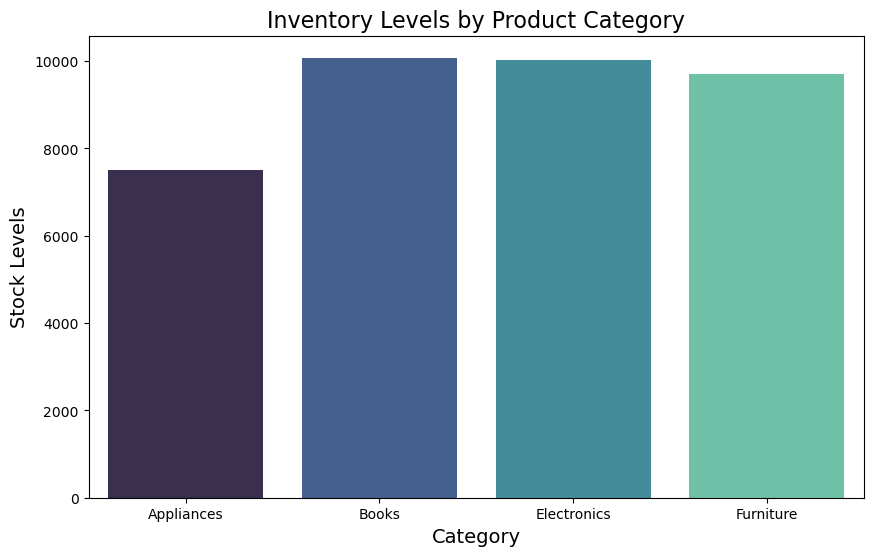

In [9]:
# Group Products by Category
stock_by_category = products.groupby('Category')['Stock'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=stock_by_category, x='Category', y='Stock', palette='mako')
plt.title('Inventory Levels by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Stock Levels', fontsize=14)
plt.show()